In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import pandas as pd
from sklearn.cluster import KMeans

In [ ]:
img = cv2.imread('/content/road/p/p_img5.jpeg')

[[151  90 235 ... 183  33 117]
 [ 61  43 234 ... 163 122 160]
 [ 26 143 102 ... 152 180  40]
 ...
 [179 205  64 ... 255 217  12]
 [175  47 192 ... 221  88 132]
 [ 57   4 236 ... 222 124 230]]
(500, 32)


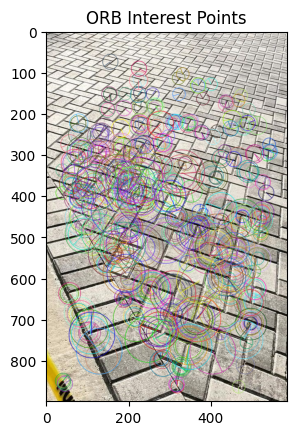

In [ ]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from cv's BRG default color order to RGB

orb = cv2.ORB_create()  # OpenCV 3 backward incompatibility: Do not create a detector with `cv2.ORB()`.
key_points, description = orb.detectAndCompute(img, None)
img_keypoints = cv2.drawKeypoints(img,key_points,img, 
                                           flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS) # Draw circles.
print(description)
print(description.shape)
plt.figure()
plt.title('ORB Interest Points')
plt.imshow(img_keypoints); plt.show()

In [ ]:
import cv2
import numpy as np
import pandas as pd
import os
from sklearn.cluster import KMeans

main_folder=r"/content/road"

for folder in os.listdir(main_folder):
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        if a is None:
           continue
        img=cv2.resize(a,(200,200)) #resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        csv_data=out.to_csv(str(folder)+'_cp_exp.csv', mode='a', header=False)
    print('Extraction of ' + str(folder) +' images Done!')  

Extraction of p images Done!
Extraction of k images Done!
Extraction of t images Done!
Extraction of c images Done!
Extraction of .ipynb_checkpoints images Done!


In [ ]:
from csv import writer
from csv import reader

main_folder=r"/content/road"
for folder in os.listdir(main_folder):
    if folder.startswith('.ipynb_checkpoints'):
        continue
    with open(str(folder)+'_cp_exp.csv', 'r') as read_obj, \
        open('withoutkmeans_exp.csv', 'a+', newline='') as write_obj:
        csv_reader = reader(read_obj)     # Create a csv.reader object from the input file object
        csv_writer = writer(write_obj)    # Create a csv.writer object from the output file object
        for row in csv_reader:
                csv_writer.writerow(row)      # Add the updated row / list to the output file

In [ ]:

import os
from csv import writer
from csv import reader

main_folder = r"/content/road"
main_folder1="/content/"
for folder in os.listdir(main_folder):
    if folder.startswith('.ipynb_checkpoints'):
        continue  # Skip files starting with '.ipynb_checkpoints'

    file_name = f"{folder}_cp_exp.csv"
    file_path = os.path.join(main_folder1, file_name)

    if os.path.isfile(file_path):
        with open(file_path, 'r') as read_obj, \
                open('withoutkmeans_exp.csv', 'a+', newline='') as write_obj:
            csv_reader = reader(read_obj)
            csv_writer = writer(write_obj)
            for row in csv_reader:
                csv_writer.writerow(row)
    else:
        print(f"File not found: {file_path}")


In [ ]:
out3=pd.read_csv('/content/withoutkmeans_exp.csv')
print(out3)


          0  164  236  212  115  195   11  116  239   19  ...   90  183   47  \
0         1   62  217  115  136  127   95  218  224   77  ...   48  228  147   
1         2   63   17  106  194  101   22  223  112   37  ...   56  204  211   
2         3   92  253  157  118  179   75   87  188   59  ...  153   63  251   
3         4  244  117  153   70  168  105   22  172  171  ...  250   58  179   
4         5  201  154  147  247   52  140  104  182  126  ...  145  227  206   
...     ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
131928  174   26  159  118  154  255  245   63  227   31  ...   42  247  127   
131929  175   38  189  160  219  253  244  178  198   27  ...  202  242   15   
131930  176   62   13  235  244  197   99  255  239   17  ...   50  234  123   
131931  177  216  149   31  254  146   64   23   37  180  ...  185  109  241   
131932  178  144  247   39  183  116   70  187  252   28  ...   42  238  249   

        210   85  99.1  162  248  138  

In [ ]:
Sum_of_squared_distances = []
road_df=pd.read_csv('/content/withoutkmeans_exp.csv').iloc[:, 1:]
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(road_df)
    Sum_of_squared_distances.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

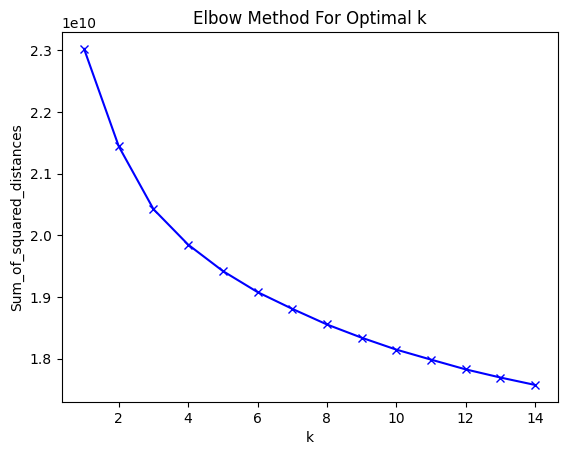

In [ ]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()


In [ ]:
import pickle
road_df=pd.read_csv('withoutkmeans_exp.csv').iloc[:, 1:]
kmeans = KMeans(n_clusters=4)
model=kmeans.fit(road_df)
print(model)
pickle.dump(model, open('kmeansmodel.pkl', 'wb')) 

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)


In [ ]:

main_folder=r"/content/road/"
main_folder1 = r"/content/"

for folder in os.listdir(main_folder):
    model = pickle.load(open('kmeansmodel.pkl', "rb"))
    path=os.path.join(main_folder,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        if a is None:
           continue
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        
        output=pd.DataFrame(model.predict(out))
        hist=np.histogram(output.values,bins=[0,1,2,3,4,5,6,7,8])
        histout=pd.DataFrame(hist[0])
        
        csv_data=histout.transpose().to_csv(str(folder)+'_1_exp'+'.csv', mode='a', header=False)
        
    print('KMeans of ' + str(folder) +' images Done!')

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  w

KMeans of p images Done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  w

KMeans of k images Done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  w

KMeans of t images Done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  w

KMeans of c images Done!
KMeans of .ipynb_checkpoints images Done!


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
main_folder=r"/content/sample_data"
main_folder1 = r"/content/"

for folder in os.listdir(main_folder):
    model = pickle.load(open('kmeansmodel.pkl', "rb"))
    path=os.path.join(main_folder1,folder)
    for filename in os.listdir(path):
        p=os.path.join(path,filename)
        a=cv2.imread(p)
        resize=(300,300)
        img=cv2.resize(a,resize)#resize image
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        orb = cv2.ORB_create()#initialise  detector
        keypoints, descriptors = orb.detectAndCompute(gray, None)
        out=pd.DataFrame(descriptors)
        
        output=pd.DataFrame(model.predict(out))
        hist=np.histogram(output.values,bins=[0,1,2,3,4,5,6,7,8])
        histout=pd.DataFrame(hist[0])
        
        csv_data=histout.transpose().to_csv(str(folder)+'_1_exp'+'.csv', mode='a', header=False)
        
    print('KMeans of ' + str(folder) +' images Done!')


KMeans of .ipynb_checkpoints images Done!


In [ ]:
from csv import writer
from csv import reader

main_folder = r"/content/road"
classes = ['Cement', 'Kaccha', 'Paver', 'Tarcoal']

i = 0
with open('/content/c_1_exp.csv', 'r') as read_obj, open('Final_ORB_kmeans_exp.csv', 'a+', newline='') as write_obj:
    csv_reader = reader(read_obj)
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        row.append(classes[i])  # Append the class in the row / list
        csv_writer.writerow(row)  # Add the updated row / list to the output file

i = 1
with open('/content/k_1_exp.csv', 'r') as read_obj, open('Final_ORB_kmeans_exp.csv', 'a+', newline='') as write_obj:
    csv_reader = reader(read_obj)
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        row.append(classes[i])  # Append the class in the row / list
        csv_writer.writerow(row)  # Add the updated row / list to the output file

i = 2
with open('/content/p_1_exp.csv', 'r') as read_obj, open('Final_ORB_kmeans_exp.csv', 'a+', newline='') as write_obj:
    csv_reader = reader(read_obj)
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        row.append(classes[i])  # Append the class in the row / list
        csv_writer.writerow(row)  # Add the updated row / list to the output file

i = 3
with open('/content/t_1_exp.csv', 'r') as read_obj, open('Final_ORB_kmeans_exp.csv', 'a+', newline='') as write_obj:
    csv_reader = reader(read_obj)
    csv_writer = writer(write_obj)
    # Read each row of the input csv file as list
    for row in csv_reader:
        row.append(classes[i])  # Append the class in the row / list
        csv_writer.writerow(row)  # Add the updated row / list to the output file


In [ ]:
out4=pd.read_csv('/content/Final_ORB_kmeans_exp.csv')
print(out4)

    0  47  51   76  58  0.1  0.2  0.3  0.4   Cement
0   0  70  44   62  43    0    0    0    0   Cement
1   0  75  78   66  85    0    0    0    0   Cement
2   0  42  77  109  87    0    0    0    0   Cement
3   0  58  67   83  64    0    0    0    0   Cement
4   0  47  55  102  92    0    0    0    0   Cement
.. ..  ..  ..  ...  ..  ...  ...  ...  ...      ...
94  0  38  28   41  45    0    0    0    0  Tarcoal
95  0  37  28   41  85    0    0    0    0  Tarcoal
96  0  38  52   54  43    0    0    0    0  Tarcoal
97  0  18  29   29  17    0    0    0    0  Tarcoal
98  0   8   0    2   0    0    0    0    0  Tarcoal

[99 rows x 10 columns]


In [ ]:

dataset = pd.read_csv('/content/Final_ORB_kmeans_exp.csv')
X = dataset.iloc[:, 1:9].values
y = dataset.iloc[:, 9].values
print(X.shape)
print(y.shape)

(99, 8)
(99,)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:

from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=50)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print(y_pred)

['Kaccha' 'Cement' 'Cement' 'Kaccha' 'Paver' 'Tarcoal' 'Paver' 'Paver'
 'Paver' 'Tarcoal' 'Cement' 'Tarcoal' 'Tarcoal' 'Paver' 'Cement' 'Kaccha'
 'Cement' 'Kaccha' 'Kaccha' 'Tarcoal' 'Kaccha' 'Paver' 'Cement' 'Paver'
 'Kaccha' 'Kaccha' 'Cement' 'Tarcoal' 'Tarcoal' 'Tarcoal']


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[5 0 2 1]
 [0 7 0 0]
 [1 1 4 0]
 [1 0 1 7]]
              precision    recall  f1-score   support

      Cement       0.71      0.62      0.67         8
      Kaccha       0.88      1.00      0.93         7
       Paver       0.57      0.67      0.62         6
     Tarcoal       0.88      0.78      0.82         9

    accuracy                           0.77        30
   macro avg       0.76      0.77      0.76        30
weighted avg       0.77      0.77      0.77        30

0.7666666666666667


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np
import itertools


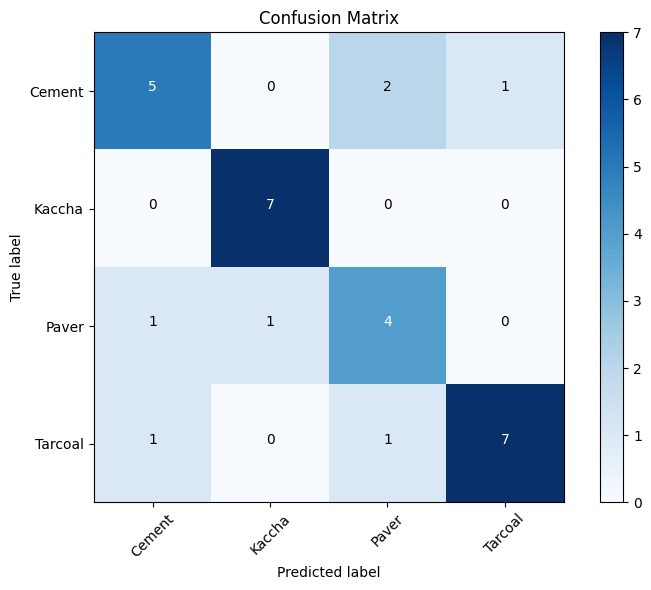

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def plot_confusion_matrix(cm, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.0
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

# Assuming y_test and y_pred are already defined
cm = confusion_matrix(y_test, y_pred)
class_names = np.unique(np.concatenate((y_test, y_pred)))

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plot_confusion_matrix(cm, classes=class_names, title='Confusion Matrix')
plt.show()


In [ ]:
from sklearn import metrics
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7666666666666667
